In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import json
import talib
from vnpy.trader.constant import (Direction, Offset, Exchange,Interval, Status)
from vnpy.trader.database import database_manager
from datetime import date, datetime, timedelta
from vnpy.app.cta_strategy import (BarGenerator,ArrayManager)
from vnpy.app.cta_strategy import BarData

In [2]:
def load_bar_data(
    symbol: str,
    exchange: Exchange,
    interval: Interval,
    start: datetime,
    end: datetime
):
    return database_manager.load_bar_data(
        symbol, exchange, interval, start, end
    )
history_data=[]
def load_bar(   symbol: str,
    exchange: Exchange,
    interval: Interval,
    start: datetime,
    end: datetime):
    print("开始加载")
    
    if start>=end:
        print("起始日期必须小于结束日期")
    total_delta=end-start
    progress_delta = timedelta(days=30)
    total_delta = end - start
    progress=0
    step_end=start+progress_delta
    while start<end:
        step_end=min(end,step_end)
        data=load_bar_data(symbol,exchange,interval,start,step_end)
        history_data.extend(data)
        
        progress+= (progress_delta/total_delta)
        progress=min(progress,1)
        progress_bar = "#" * int(progress * 10)
        print(f"加载进度：{progress_bar} [{progress:.0%}]")       
        start=step_end
        step_end+=progress_delta        
        print()
    print("历史数据加载完成")         

from  datetime import datetime

def output(msg):
    print(f"{datetime.now()}\t{msg}") 

In [3]:
load_bar("XBTUSD",Exchange.BITMEX,Interval.MINUTE,
        datetime(2019, 8, 27, 0, 0, 0, 0),
         datetime(2019, 10, 29,12 , 0, 0, 0),
        )

开始加载
加载进度：#### [47%]

加载进度：######### [94%]

加载进度：########## [100%]

历史数据加载完成


In [4]:
def convertArray2Df(a:[]):
    t=[]
    o=[]
    h=[]
    l=[]
    c=[]
    v=[]
    for bar in a:
        time=bar.datetime
        open_price=bar.open_price
        high_price=bar.high_price
        low_price=bar.low_price
        close_price=bar.close_price
        volume = bar.volume
    
        t.append(time)
        o.append(open_price)
        h.append(high_price)
        l.append(low_price)
        c.append(close_price)
        v.append(volume)
    
    original = pd.DataFrame()
    original['open']=o
    original['high']=h
    original['low']=l
    original['close']=c
    original['volume']=v
    original.index = t
    return original

In [5]:
df = convertArray2Df(history_data)

In [6]:
# convert minute df to hour df
def convertM2H(df,interval):
    ret= pd.DataFrame()    
    ret["open"] = df["open"].resample(interval, how="first")
    ret["high"] = df["high"].resample(interval, how="max")
    ret["low"] = df["low"].resample(interval, how="min")
    ret["close"] = df["close"].resample(interval, how="last")
    ret["volume"] = df["volume"].resample(interval, how="sum")
    
    return ret

In [8]:
df_hour=convertM2H(df,"1h")

In [9]:
df_hour.head()

,open,high,low,close,volume
2019-08-27 00:00:00,10368.5,10384.0,10303.5,10343.0,68800046.0
2019-08-27 01:00:00,10343.0,10360.0,10303.5,10313.5,60253236.0
2019-08-27 02:00:00,10313.5,10314.0,10201.5,10226.0,180464840.0
2019-08-27 03:00:00,10226.0,10229.0,10080.0,10175.0,305685544.0
2019-08-27 04:00:00,10175.0,10176.5,10150.0,10157.0,44940611.0


In [10]:
import talib
atr = talib.ATR(df['high'],df['low'],df['close'],20)
natr = talib.NATR(df['high'],df['low'],df['close'],20)

In [11]:
df['atr']=atr
df['natr']=natr

In [13]:
df.head()

,open,high,low,close,volume,atr,natr
2019-08-27 00:00:00,10368.5,10369.0,10368.5,10369.0,239004.0,NaN,NaN
2019-08-27 00:01:00,10369.0,10380.0,10368.5,10380.0,3285444.0,NaN,NaN
2019-08-27 00:02:00,10380.0,10384.0,10379.5,10381.0,3274163.0,NaN,NaN
2019-08-27 00:03:00,10381.0,10381.0,10371.5,10372.0,1830468.0,NaN,NaN
2019-08-27 00:04:00,10372.0,10372.0,10365.5,10365.5,1294693.0,NaN,NaN


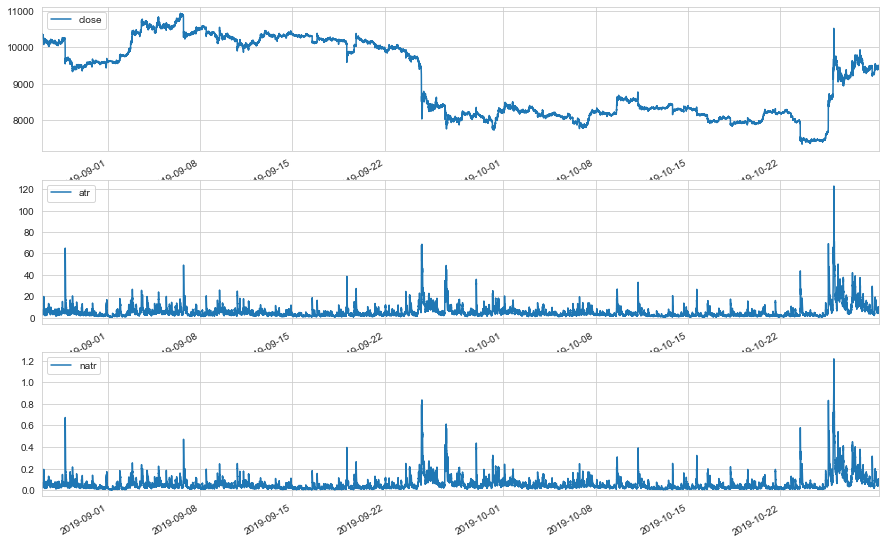

In [12]:
fig, axes = plt.subplots(3, 1,figsize=(15,10))
df[['close']].plot(ax=axes[0])
df[['atr']].plot(ax=axes[1])
df[['natr']].plot(ax=axes[2])

In [ ]:
df.head(30)

In [ ]:
index = pd.date_range('1/1/2000', periods=9, freq='T')

In [ ]:
index

In [ ]:
type(index)

In [ ]:
series = pd.Series(range(9), index=index)

In [ ]:
type(series.index)

In [ ]:
series.resample('3T').sum()

In [ ]:
series.resample('3T', label='right').sum()

In [ ]:
series.resample('3T', label='right', closed='right').sum()